In [1]:
!nvidia-smi

Thu Jun  2 02:46:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.94       Driver Version: 470.94       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   26C    P8     6W / 350W |      2MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:82:00.0 Off |                  N/A |
|  0%   

In [10]:
from tensorflow.keras.applications import ResNet50

BATCH_SIZE = 32

In [11]:
model = ResNet50(weights='imagenet')

In [12]:
import numpy as np
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt

url='n02099601_3004.jpg'
img = resize(io.imread(url), (224, 224))
input_batch = 255*np.array(np.repeat(np.expand_dims(np.array(img, dtype=np.float32), axis=0), BATCH_SIZE, axis=0), dtype=np.float32)

input_batch.shape

(32, 224, 224, 3)

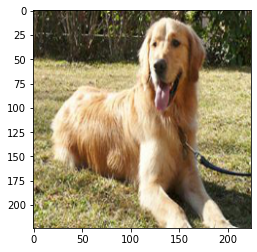

In [6]:
plt.imshow(input_batch[0]/255)

In [13]:
predictions = model.predict(input_batch) # warm up
indices = (-predictions[0]).argsort()[:5]
print("Class | Probability (out of 1)")
list(zip(indices, predictions[0][indices]))

Class | Probability (out of 1)


[(160, 0.32256573),
 (169, 0.23734361),
 (212, 0.18466648),
 (170, 0.08061244),
 (207, 0.030543853)]

In [14]:
%%timeit

result = model.predict_on_batch(input_batch) # Check default performance

72.5 ms ± 4.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
import onnx

In [8]:
import  keras2onnx

AttributeError: module 'tensorflow.python.keras' has no attribute 'applications'